In [53]:
import random
from collections import Counter
import pandas as pd

In [2]:
erk = "MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQYIGEGAYGMVSSAYDHVRKTRVAIKKISPFEHQTYCQRTLREIQILLRFRHENVIGIRDILRASTLEAMRDVYIVQDLMETDLYKLLKSQQLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLINTTCDLKICDFGLARIADPEHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINMKARNYLQSLPSKTKVAWAKLFPKSDSKALDLLDRMLTFNPNKRITVEEALAHPYLEQYYDPTDEPVAEEPFTFAMELDDLPKERLKELIFQETARFQPGVLEAP"

In [26]:
aas = ['M', 'A', 'Q', 'G', 'E', 'P', 'R', 'T', 'V', 'K', 'F', 'D', 'Y', 'L', 'I', 'S', 'H', 'C', 'N', 'W']

In [7]:
dom = erk[41:330]

In [4]:
seqs = {}


6280

In [9]:
len(dom) / 2

144.5

In [15]:
xpos = 144

In [18]:
print(dom[:xpos])
print(dom[xpos+1:])


YTQLQYIGEGAYGMVSSAYDHVRKTRVAIKKISPFEHQTYCQRTLREIQILLRFRHENVIGIRDILRASTLEAMRDVYIVQDLMETDLYKLLKSQQLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLINTTCDLKICDF
LARIADPEHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINMKARNYLQSLPSKTKVAWAKLFPKSDSKALDLLDRMLTFNPNKRITVEEALAHPYL


In [21]:
def alter_pos(seq, pos, res):
    prev_seq = seq[:pos].lower()
    next_seq = seq[pos + 1 :].lower()
    return prev_seq + res + next_seq
    
    

In [28]:
a = "YTQLQYIGEGAYGMVSSAYDHVRKTRVA"

In [31]:
def get_altered_seqs(seq, pos):
    output = []
    for aa in aas:
        output.append(alter_pos(seq, pos, aa))
    return output
    

In [39]:
def get_seqs_for_xpos(seq, pos):
    
    aas = ['M', 'A', 'Q', 'G', 'E', 'P', 'R', 'T', 'V', 'K', 'F', 'D', 'Y', 'L', 'I', 'S', 'H', 'C', 'N', 'W']
    output = {}
    
    for aa in aas:
        output[f'{pos}_{seq[pos]}_{aa}'] = alter_pos(seq, pos, aa)
    return output

In [49]:
sequences = {}
for pos in range(len(erk)):
    sequences.update(get_seqs_for_xpos(erk, pos))

In [54]:
seqs_df = pd.DataFrame(sequences.items(), columns=['idx', 'seq'])

In [55]:
seqs_df

,idx,seq
0,0_M_M,Maaaaaqgggggeprrtegvgpgvpgevemvkgqpfdvgprytqlq...
1,0_M_A,Aaaaaaqgggggeprrtegvgpgvpgevemvkgqpfdvgprytqlq...
2,0_M_Q,Qaaaaaqgggggeprrtegvgpgvpgevemvkgqpfdvgprytqlq...
3,0_M_G,Gaaaaaqgggggeprrtegvgpgvpgevemvkgqpfdvgprytqlq...
4,0_M_E,Eaaaaaqgggggeprrtegvgpgvpgevemvkgqpfdvgprytqlq...
...,...,...
7575,378_P_S,maaaaaqgggggeprrtegvgpgvpgevemvkgqpfdvgprytqlq...
7576,378_P_H,maaaaaqgggggeprrtegvgpgvpgevemvkgqpfdvgprytqlq...
7577,378_P_C,maaaaaqgggggeprrtegvgpgvpgevemvkgqpfdvgprytqlq...
7578,378_P_N,maaaaaqgggggeprrtegvgpgvpgevemvkgqpfdvgprytqlq...


In [56]:
from bio_embeddings.project import umap_reduce
from bio_embeddings.visualize import render_scatter_plotly
from bio_embeddings.embed import ProtTransT5XLU50Embedder
import time
from datetime import datetime

embedder = ProtTransT5XLU50Embedder(model_directory= "/data/franco/datasets/prot_embedding_weights/half_prottrans_t5_xl_u50/")

/home/fernando/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [58]:
seqs_df["seq"] = seqs_df.seq.str.upper()


,idx,seq
0,0_M_M,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...
1,0_M_A,AAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...
2,0_M_Q,QAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...
3,0_M_G,GAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...
4,0_M_E,EAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...
...,...,...
7575,378_P_S,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...
7576,378_P_H,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...
7577,378_P_C,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...
7578,378_P_N,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...


In [62]:
def get_et5(seqs, verbose=True):
    embeddings = []
    
    


    start = datetime.now()
    if verbose:
        print("Starting at", start.strftime("%H:%M:%S"))
    
    for i,seq in enumerate(seqs):
        print('.',end='')
        if i > 0 and  (i % 100 == 0) and verbose:
            print(f'{i}/{len(seq)}')
        embeddings.append(embedder.embed(seq))
        
    if verbose:
        print("Finishing at", datetime.now().strftime("%H:%M:%S"))
        elapsed = datetime.now() - start
        print("Elapsed",  str(elapsed))
        
        print( (elapsed / len(seqs)).seconds, 'seconds per sequence')
        
    return embeddings

In [ ]:
embeddings = get_et5(seqs_df.seq)

Starting at 15:48:10
.....................................................................................................100/379
....................................................................................................200/379
....................................................................................................300/379
....................................................................................................400/379
....................................................................................................500/379
....................................................................................................600/379
....................................................................................................700/379
....................................................................................................800/379
....................................................................................................900/379
......

In [67]:
len(embeddings)

7580

In [69]:
seqs_df['embedding'] = embeddings

In [72]:
#import pickle
#
#with open('seqs_1a1_erk_28_10.pickle', 'wb') as pf:
#    pickle.dump(seqs_df, pf)

In [4]:
import pickle

with open('seqs_1a1_erk_28_10.pickle', 'br') as pf:
    seqs_df = pickle.load( pf)



In [5]:
seqs_df['changed_pos'] = seqs_df.idx.str.split('_').str[0].astype(int)
seqs_df['ref_res'] = seqs_df.idx.str.split('_').str[1]
seqs_df['alt_ref'] = seqs_df.idx.str.split('_').str[2]


In [6]:
seqs_df

,idx,seq,embedding,changed_pos,ref_res,alt_ref
0,0_M_M,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[0.14807291, -0.061710272, -0.16046412, 0.246...",0,M,M
1,0_M_A,AAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[-0.017355144, -0.24095826, -0.18541417, 0.29...",0,M,A
2,0_M_Q,QAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[-0.06556134, -0.27305928, -0.14548203, 0.295...",0,M,Q
3,0_M_G,GAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[-0.05329977, -0.296827, -0.06620536, 0.31765...",0,M,G
4,0_M_E,EAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[-0.07443688, -0.2843343, -0.14651439, 0.2802...",0,M,E
...,...,...,...,...,...,...
7575,378_P_S,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[0.14916761, -0.05918797, -0.17273687, 0.2443...",378,P,S
7576,378_P_H,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[0.14843906, -0.06374911, -0.17499854, 0.2455...",378,P,H
7577,378_P_C,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[0.15183444, -0.06203218, -0.17949831, 0.2441...",378,P,C
7578,378_P_N,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[0.15151685, -0.05828126, -0.18262146, 0.2455...",378,P,N


In [7]:
seqs_df.head(500)

,idx,seq,embedding,changed_pos,ref_res,alt_ref
0,0_M_M,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[0.14807291, -0.061710272, -0.16046412, 0.246...",0,M,M
1,0_M_A,AAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[-0.017355144, -0.24095826, -0.18541417, 0.29...",0,M,A
2,0_M_Q,QAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[-0.06556134, -0.27305928, -0.14548203, 0.295...",0,M,Q
3,0_M_G,GAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[-0.05329977, -0.296827, -0.06620536, 0.31765...",0,M,G
4,0_M_E,EAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[-0.07443688, -0.2843343, -0.14651439, 0.2802...",0,M,E
...,...,...,...,...,...,...
495,24_P_S,MAAAAAQGGGGGEPRRTEGVGPGVSGEVEMVKGQPFDVGPRYTQLQ...,"[[0.1404461, -0.060427066, -0.16484085, 0.2483...",24,P,S
496,24_P_H,MAAAAAQGGGGGEPRRTEGVGPGVHGEVEMVKGQPFDVGPRYTQLQ...,"[[0.13354145, -0.06059392, -0.16443193, 0.2401...",24,P,H
497,24_P_C,MAAAAAQGGGGGEPRRTEGVGPGVCGEVEMVKGQPFDVGPRYTQLQ...,"[[0.13269974, -0.055467088, -0.16418459, 0.238...",24,P,C
498,24_P_N,MAAAAAQGGGGGEPRRTEGVGPGVNGEVEMVKGQPFDVGPRYTQLQ...,"[[0.1399993, -0.06064699, -0.16760603, 0.24871...",24,P,N


In [91]:
for pos,_ in enumerate(erk, start=1):
  
    for _, row in seqs_df.head(500).iterrows():
        
        pos_embeddings = seqs_df.embedding.str[pos]
        
        break
    break
        
        
        #dist = row.changed_pos - i
    
   #     print(i, row.changed_pos, dist)

In [10]:
pos = 0
change_pos = 1

In [11]:
pos_embeddings = seqs_df.query('changed_pos == @change_pos').embedding.str[pos]

In [12]:
ref_embeddings = seqs_df.iloc[0,2][pos]

In [43]:
seqs_df.iloc[0,2]

array([[ 0.14807291, -0.06171027, -0.16046412, ...,  0.05515552,
         0.25648457,  0.24984613],
       [ 0.10898272, -0.1831715 , -0.14487347, ...,  0.10600671,
         0.33605614,  0.2168887 ],
       [ 0.08092349, -0.23182347, -0.17378037, ...,  0.07944067,
         0.3395805 ,  0.20044641],
       ...,
       [-0.16134788, -0.01262604,  0.40106702, ..., -0.05761923,
         0.06111239,  0.2782966 ],
       [-0.13150422, -0.15539233,  0.19230433, ..., -0.06554767,
         0.18556772,  0.19023587],
       [-0.23045944, -0.06073596,  0.2605823 , ...,  0.00456234,
        -0.03331331,  0.24068144]], dtype=float32)

In [14]:
pos_embeddings

20    [0.31016275, -0.08145891, -0.2662504, 0.253273...
21    [0.14807291, -0.061710272, -0.16046412, 0.2461...
22    [0.3192587, -0.094872825, -0.23838022, 0.22998...
23    [0.2359562, -0.028335234, -0.17996764, 0.30880...
24    [0.20998573, -0.09428838, -0.18942598, 0.32318...
25    [0.16754223, -0.10357768, -0.1198803, 0.206587...
26    [0.19320495, -0.064753585, -0.1694427, 0.29178...
27    [0.110187165, -0.083701834, -0.12673976, 0.345...
28    [0.17564642, -0.06396803, -0.23723601, 0.37726...
29    [0.1467197, -0.06627122, -0.16605946, 0.311351...
30    [0.17666556, -0.06959322, -0.114857055, 0.3916...
31    [0.17420724, -0.09960941, -0.12284233, 0.35453...
32    [0.20112553, -0.051008675, -0.14916264, 0.3563...
33    [0.23457602, -0.076706335, -0.2042832, 0.30979...
34    [0.14780535, -0.07784709, -0.19526099, 0.35761...
35    [0.11466328, -0.06344261, -0.065356046, 0.2609...
36    [0.2586235, -0.07701254, -0.21561345, 0.269426...
37    [0.1842744, -0.028036028, -0.1566576, 0.32

In [107]:
pos_embeddings

20    [0.31016275, -0.08145891, -0.2662504, 0.253273...
21    [0.14807291, -0.061710272, -0.16046412, 0.2461...
22    [0.3192587, -0.094872825, -0.23838022, 0.22998...
23    [0.2359562, -0.028335234, -0.17996764, 0.30880...
24    [0.20998573, -0.09428838, -0.18942598, 0.32318...
25    [0.16754223, -0.10357768, -0.1198803, 0.206587...
26    [0.19320495, -0.064753585, -0.1694427, 0.29178...
27    [0.110187165, -0.083701834, -0.12673976, 0.345...
28    [0.17564642, -0.06396803, -0.23723601, 0.37726...
29    [0.1467197, -0.06627122, -0.16605946, 0.311351...
30    [0.17666556, -0.06959322, -0.114857055, 0.3916...
31    [0.17420724, -0.09960941, -0.12284233, 0.35453...
32    [0.20112553, -0.051008675, -0.14916264, 0.3563...
33    [0.23457602, -0.076706335, -0.2042832, 0.30979...
34    [0.14780535, -0.07784709, -0.19526099, 0.35761...
35    [0.11466328, -0.06344261, -0.065356046, 0.2609...
36    [0.2586235, -0.07701254, -0.21561345, 0.269426...
37    [0.1842744, -0.028036028, -0.1566576, 0.32

In [15]:
from scipy.spatial import distance

In [18]:
import pandas as pd

In [42]:
len(ref_embeddings)

1024

In [41]:
pos_embeddings

1980    [0.14446849, -0.063855335, -0.15926562, 0.2456...
1981    [0.1462661, -0.06638278, -0.15899976, 0.240993...
1982    [0.14724815, -0.064972214, -0.14916714, 0.2449...
1983    [0.16556975, -0.058992323, -0.14305466, 0.2400...
1984    [0.15900071, -0.054529477, -0.1438101, 0.24196...
1985    [0.16362934, -0.06012588, -0.13378297, 0.23705...
1986    [0.16031875, -0.051993627, -0.13928616, 0.2357...
1987    [0.14623669, -0.063387126, -0.15445349, 0.2463...
1988    [0.14807291, -0.061710272, -0.16046412, 0.2461...
1989    [0.15802614, -0.048976127, -0.14465538, 0.2399...
1990    [0.1450196, -0.063643195, -0.15795787, 0.24703...
1991    [0.16519727, -0.049320795, -0.13386637, 0.2364...
1992    [0.13978848, -0.06758648, -0.15371846, 0.24379...
1993    [0.14778243, -0.060053863, -0.15918252, 0.2474...
1994    [0.14773197, -0.06030981, -0.15727407, 0.24760...
1995    [0.15426585, -0.06005265, -0.15320948, 0.24496...
1996    [0.15012738, -0.061521668, -0.15080354, 0.2440...
1997    [0.131

In [ ]:
output = []
for change_pos in range(100):
    pos = 0
    pos_embeddings = seqs_df.query('changed_pos == @change_pos').embedding.str[pos]
    ref_embeddings = 
    cos_dist = []
    for cemb in pos_embeddings:
        print(distance.cosine(ref_embeddings, cemb))
        cos_dist.append(distance.cosine(ref_embeddings, cemb))
    output.append(sum(cos_dist)/len(cos_dist))
    #print(pos, sum(cos_dist)/len(cos_dist))

In [34]:
seqs_df.query('changed_pos == @change_pos').embedding.str[pos]

1980    [0.056221034, 0.31971556, 0.13257886, 0.027157...
1981    [0.09114731, 0.29337958, 0.13447063, 0.0324153...
1982    [0.1043675, 0.24827655, 0.14176397, 0.07283045...
1983    [0.12321277, 0.312958, 0.12218105, 0.05839251,...
1984    [0.11474464, 0.24262851, 0.1482045, 0.04109644...
1985    [0.09397624, 0.2896451, 0.1449192, 0.06851512,...
1986    [0.1279741, 0.2781731, 0.18153527, 0.10906267,...
1987    [0.10274178, 0.29994485, 0.14773709, 0.0572613...
1988    [0.109279275, 0.33901188, 0.13655649, 0.028531...
1989    [0.1124631, 0.26279175, 0.18701431, 0.10424612...
1990    [0.056545787, 0.29558194, 0.17515615, 0.055725...
1991    [0.13695835, 0.2614581, 0.1616925, 0.080261946...
1992    [0.0844329, 0.25365946, 0.17538963, 0.09094094...
1993    [0.072807305, 0.33578682, 0.1222782, 0.0294608...
1994    [0.10910018, 0.35364065, 0.14962028, 0.0344082...
1995    [0.105132304, 0.27982017, 0.16192019, 0.056863...
1996    [0.12605108, 0.25710642, 0.18661726, 0.1076607...
1997    [0.116

<AxesSubplot: >

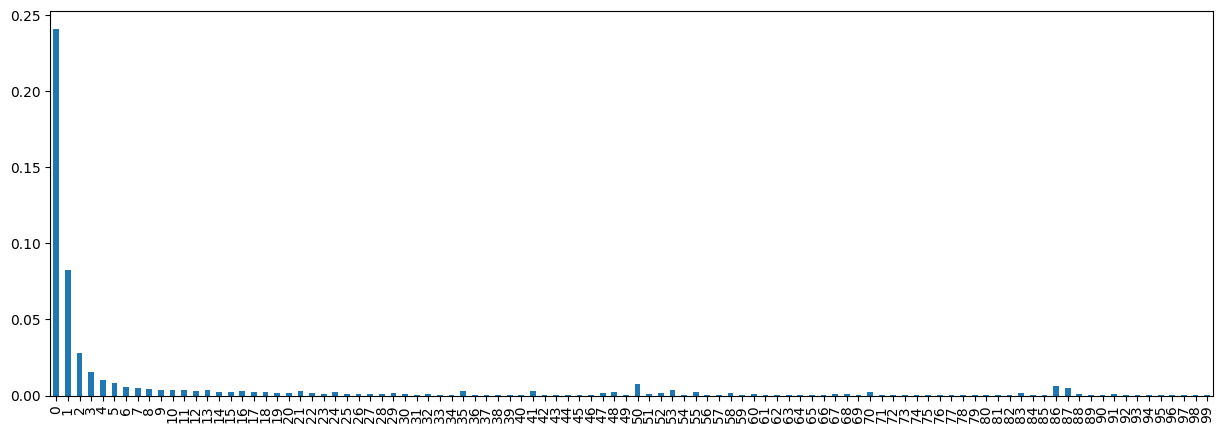

In [20]:
pd.Series(output).plot.bar(figsize=(15,5))

In [21]:
output = []

for pos in range(50,100):
    ref_embeddings = seqs_df.iloc[0,2][pos]
    
    for change_pos in range(100):
        if change_pos != pos:
        
            pos_embeddings = seqs_df.query('changed_pos == @change_pos').embedding.str[pos]

            cos_dist = []
            for cemb in pos_embeddings:

                cos_dist.append(distance.cosine(ref_embeddings, cemb))
            output.append([change_pos - pos, sum(cos_dist)/len(cos_dist)])
            #print(pos, sum(cos_dist)/len(cos_dist))

In [22]:
df = pd.DataFrame(output, columns=['pos','dif'])

<AxesSubplot: xlabel='pos'>

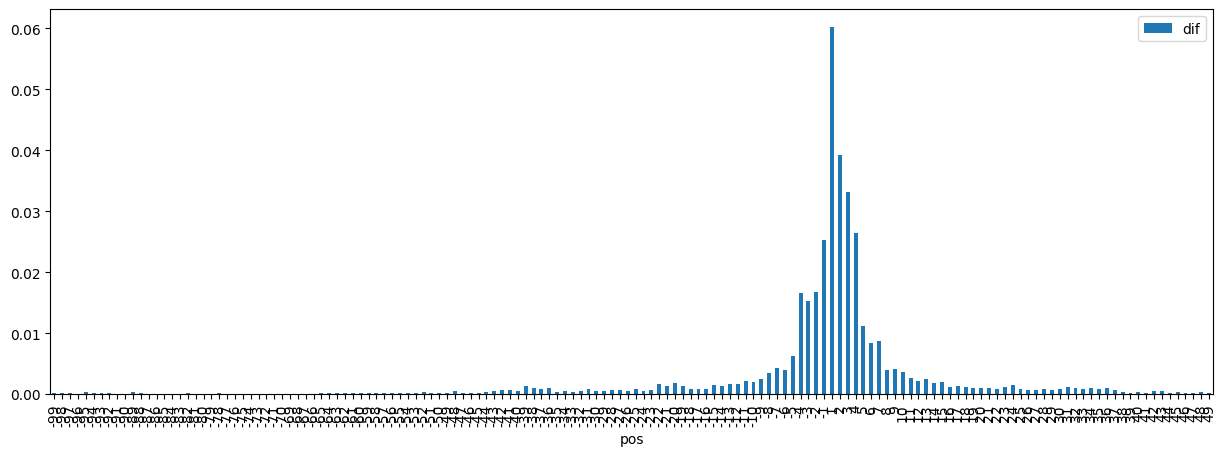

In [23]:
df.groupby('pos').agg('mean').plot.bar(figsize=(15,5))

<AxesSubplot: xlabel='pos'>

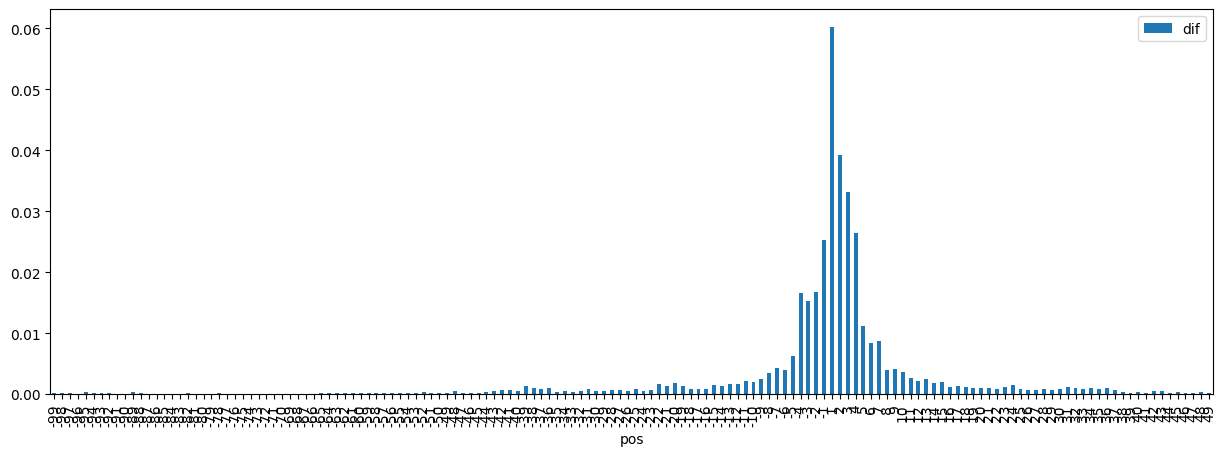

In [170]:
df.groupby('pos').agg('mean').plot.bar(figsize=(15,5))

(50.0, 150.0)

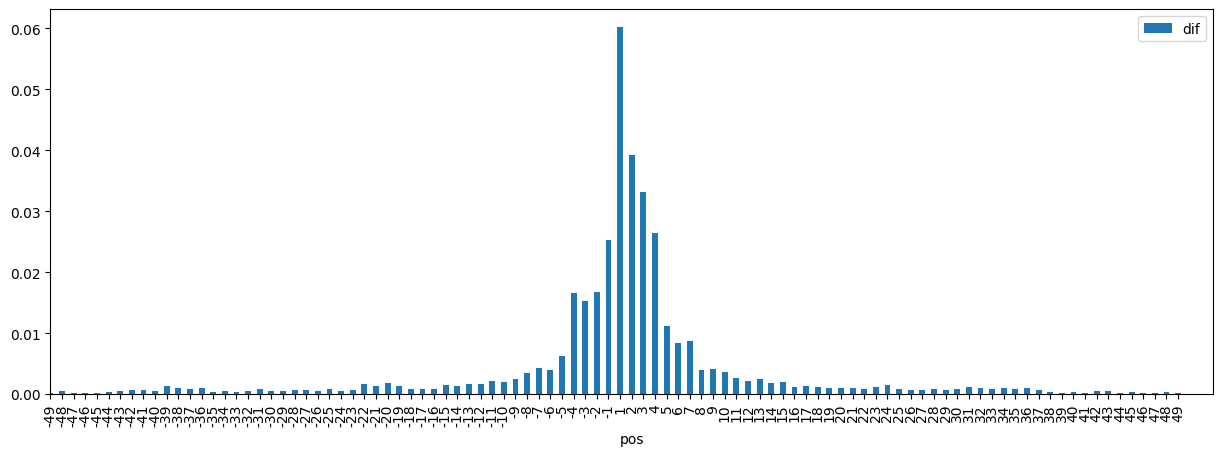

In [29]:
import matplotlib.pyplot as plt
ax = df.groupby('pos').agg('mean').plot.bar(figsize=(15,5))
plt.xlim(50, 150)

In [65]:
seqs_df

,idx,seq,embedding,changed_pos,ref_res,alt_ref
0,0_M_M,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[0.14807291, -0.061710272, -0.16046412, 0.246...",0,M,M
1,0_M_A,AAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[-0.017355144, -0.24095826, -0.18541417, 0.29...",0,M,A
2,0_M_Q,QAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[-0.06556134, -0.27305928, -0.14548203, 0.295...",0,M,Q
3,0_M_G,GAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[-0.05329977, -0.296827, -0.06620536, 0.31765...",0,M,G
4,0_M_E,EAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[-0.07443688, -0.2843343, -0.14651439, 0.2802...",0,M,E
...,...,...,...,...,...,...
7575,378_P_S,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[0.14916761, -0.05918797, -0.17273687, 0.2443...",378,P,S
7576,378_P_H,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[0.14843906, -0.06374911, -0.17499854, 0.2455...",378,P,H
7577,378_P_C,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[0.15183444, -0.06203218, -0.17949831, 0.2441...",378,P,C
7578,378_P_N,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,"[[0.15151685, -0.05828126, -0.18262146, 0.2455...",378,P,N


In [63]:
reference = seqs_df.iloc[0,2]

In [73]:
to_plot = []
for pos in [0, 10, 20, 50, 100]:

    output = []
    ref_embeddings = reference[pos]
    for change_pos in range(100):

        pos_embeddings = seqs_df[seqs_df.ref_res != seqs_df.alt_ref].query('changed_pos == @change_pos').embedding.str[pos]

        cos_dist = []
        for cemb in pos_embeddings:
            d = distance.cosine(ref_embeddings, cemb)
            if d:
                cos_dist.append(d)

        output.append(sum(cos_dist)/len(cos_dist))
        #print(pos, sum(cos_dist)/len(cos_dist))
    to_plot.append(output)
    

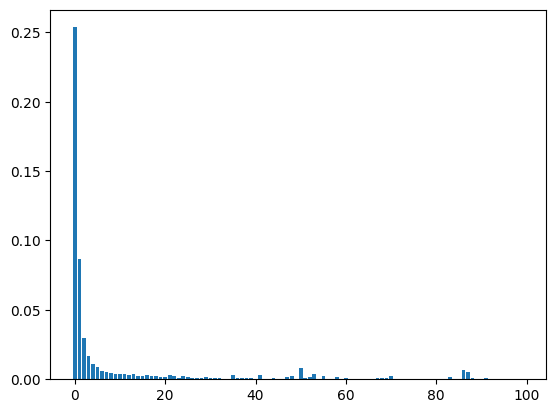

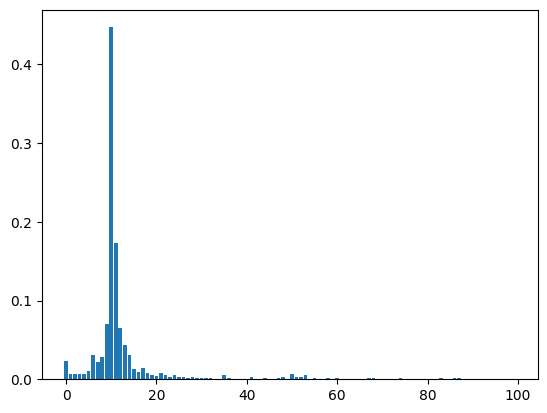

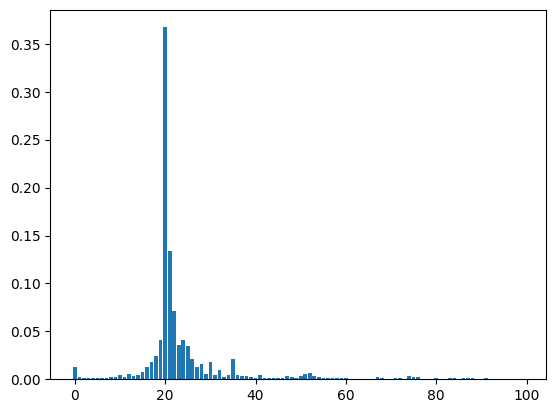

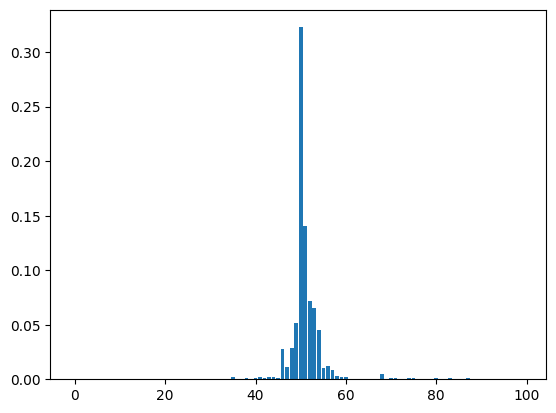

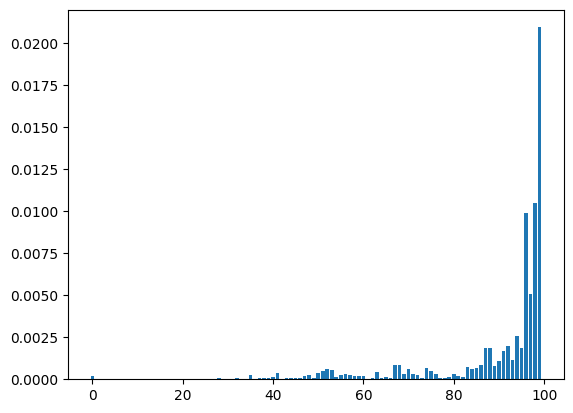

In [85]:
for n  in to_plot:
    plt.bar(x=range(len(n)), height=n)
    plt.show()